In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
mydata=pd.read_csv('/content/50_Startups.csv')

In [3]:
mydata.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


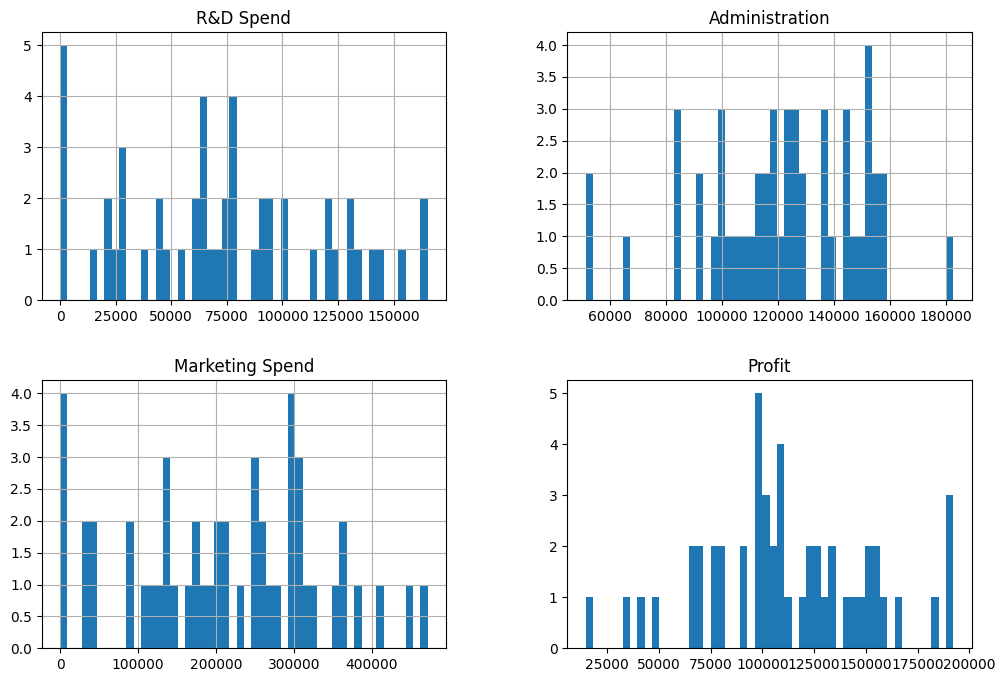

In [5]:
mydata.hist(bins=50,figsize=(12,8))
plt.grid(False)
plt.show()

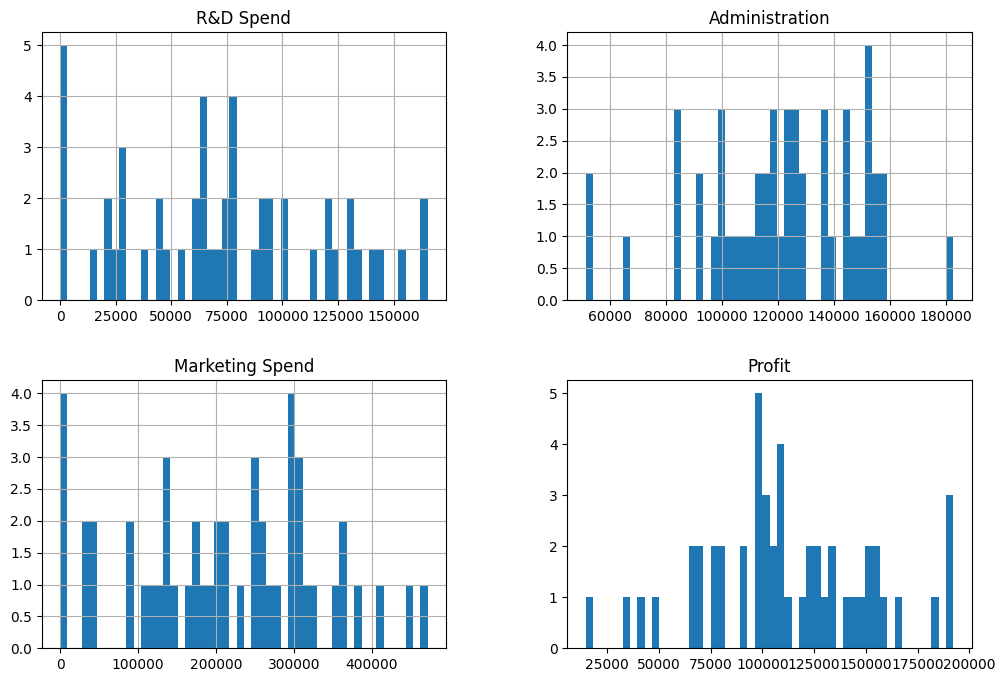

In [6]:
import matplotlib.pyplot as plt
mydata.hist(bins=50,figsize=(12,8))
plt.grid(False)
plt.show()


<Axes: xlabel='R&D Spend', ylabel='Administration'>

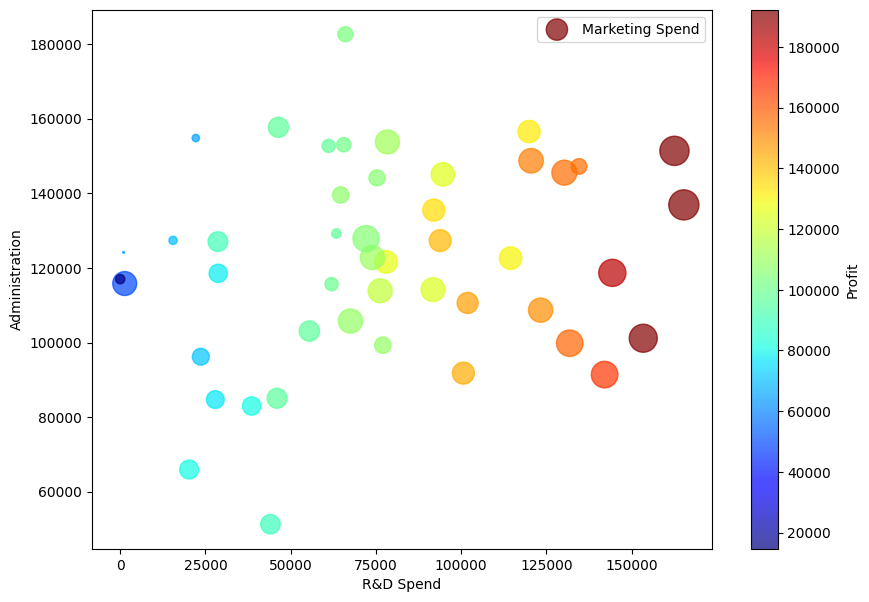

In [7]:
mydata.plot(kind="scatter",x="R&D Spend",y="Administration",c="Profit",cmap="jet",colorbar=True,legend=True,sharex=False,figsize=(10,7),s=mydata['Marketing Spend']/1000,label="Marketing Spend",alpha=0.7)

In [8]:
mydata.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [9]:
mydata.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [10]:
x=mydata[["R&D Spend"]]
y=mydata["Profit"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [14]:
r2_score( y_test, y_pred)

0.9265108109341951

In [15]:
print(lr.intercept_)

49336.6680379911


In [19]:
type(lr)


sklearn.linear_model._base.LinearRegression

In [20]:
import pickle

In [21]:
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [22]:
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [24]:
x[0:5]

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [25]:
clf2.predict(x[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([190480.25107829, 188131.54561896, 180315.73844483, 172574.27208786,
       170640.7877067 ])

In [26]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

       Actual      Predicted
13  134307.35  127862.209964
39   81005.76   82250.563346
30   99937.59  102255.720782
45   64926.08   50190.473476
17  125370.37  130136.881905
